# Instalación de las librerías

In [1]:
!pip install ultralytics
!pip install -U ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 10.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

# Carga de librerías

In [2]:
import os
import random

from ultralytics import YOLO
import cv2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

import yaml

# Descarga dataset

In [3]:
# Download data from repository and unzip
%cd /content
!wget https://raw.githubusercontent.com/Laboratorios-2-MIT-MC/IA-Ciber/main/Pr%C3%A1cticas/Proyecto%20Final/Dataset/trafic_data.zip.001 -O trafic_data.zip.001
!wget https://raw.githubusercontent.com/Laboratorios-2-MIT-MC/IA-Ciber/main/Pr%C3%A1cticas/Proyecto%20Final/Dataset/trafic_data.zip.002 -O trafic_data.zip.002
!7z x -y -sdel trafic_data.zip.001
!rm trafic_data.zip.* -f

/content
--2024-04-15 17:04:21--  https://raw.githubusercontent.com/Laboratorios-2-MIT-MC/IA-Ciber/main/Pr%C3%A1cticas/Proyecto%20Final/Dataset/trafic_data.zip.001
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104857600 (100M) [application/octet-stream]
Saving to: ‘trafic_data.zip.001’

trafic_data.zip.001 100%[===================>] 100.00M   264MB/s    in 0.4s    

2024-04-15 17:04:24 (264 MB/s) - ‘trafic_data.zip.001’ saved [104857600/104857600]

--2024-04-15 17:04:24--  https://raw.githubusercontent.com/Laboratorios-2-MIT-MC/IA-Ciber/main/Pr%C3%A1cticas/Proyecto%20Final/Dataset/trafic_data.zip.002
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.

# Descarga del modelo

In [4]:
# Download the model and unzip
%cd /content
!wget https://raw.githubusercontent.com/Laboratorios-2-MIT-MC/IA-Ciber/PFinal-J0nan/Pr%C3%A1cticas/Proyecto%20Final/Modelo/Yolo_train/YOLOv8_Ve.zip.001 -O YOLOv8_Ve.zip.001
!wget https://raw.githubusercontent.com/Laboratorios-2-MIT-MC/IA-Ciber/PFinal-J0nan/Pr%C3%A1cticas/Proyecto%20Final/Modelo/Yolo_train/YOLOv8_Ve.zip.002 -O YOLOv8_Ve.zip.002
!7z x -y YOLOv8_Ve.zip.001
!rm YOLOv8_Ve.zip.* -f

/content
--2024-04-15 17:04:33--  https://raw.githubusercontent.com/Laboratorios-2-MIT-MC/IA-Ciber/main/Pr%C3%A1cticas/Proyecto%20Final/Modelo/yolov8x.zip.001
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104857600 (100M) [application/octet-stream]
Saving to: ‘yolov8x.zip.001’

yolov8x.zip.001     100%[===================>] 100.00M   173MB/s    in 0.6s    

2024-04-15 17:04:36 (173 MB/s) - ‘yolov8x.zip.001’ saved [104857600/104857600]

--2024-04-15 17:04:36--  https://raw.githubusercontent.com/Laboratorios-2-MIT-MC/IA-Ciber/main/Pr%C3%A1cticas/Proyecto%20Final/Modelo/yolov8x.zip.002
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuse

# Exploración del dataset

In [5]:
# Path to files and labels
train_images = "/content/trafic_data/train/images"
train_labels = "/content/trafic_data/train/labels"

valid_images = "/content/trafic_data/train/images"
valid_labels = "/content/trafic_data/train/labels"

In [6]:
def loadLabels(image_file, image_labels):
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(image_labels, label_file)

    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    return labels

def plotObjectDetections(ax, image, labels):
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')

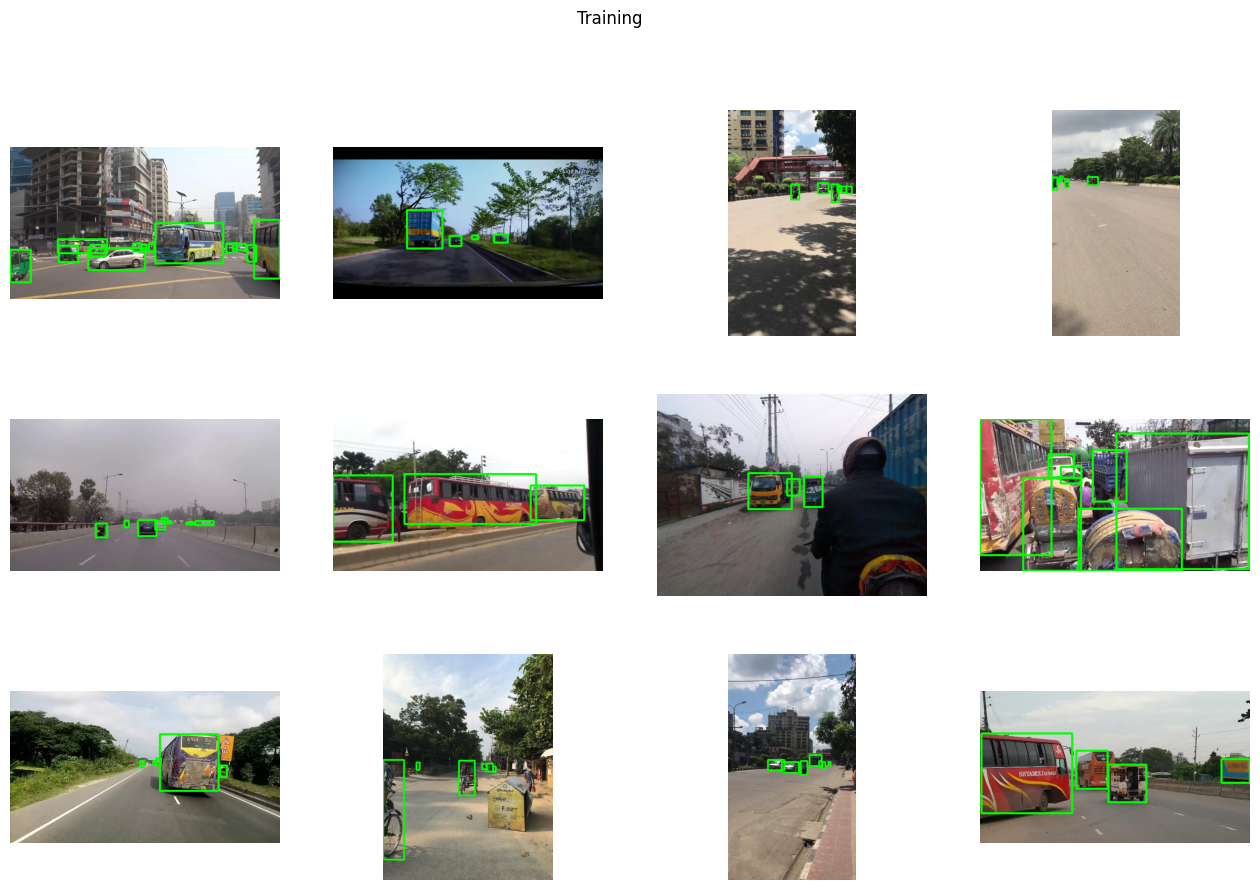

In [7]:
# List of all the training images
image_files = os.listdir(train_images)

# Choose 12 random image files from the list
random_images = random.sample(image_files, 12)

# Set up the plot
fig, axs = plt.subplots(3, 4, figsize=(16, 10))

for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    labels = loadLabels(image_file, train_labels)

    # Plot object detections
    plotObjectDetections(axs[row, col], image, labels)

plt.suptitle("Training")
plt.show()

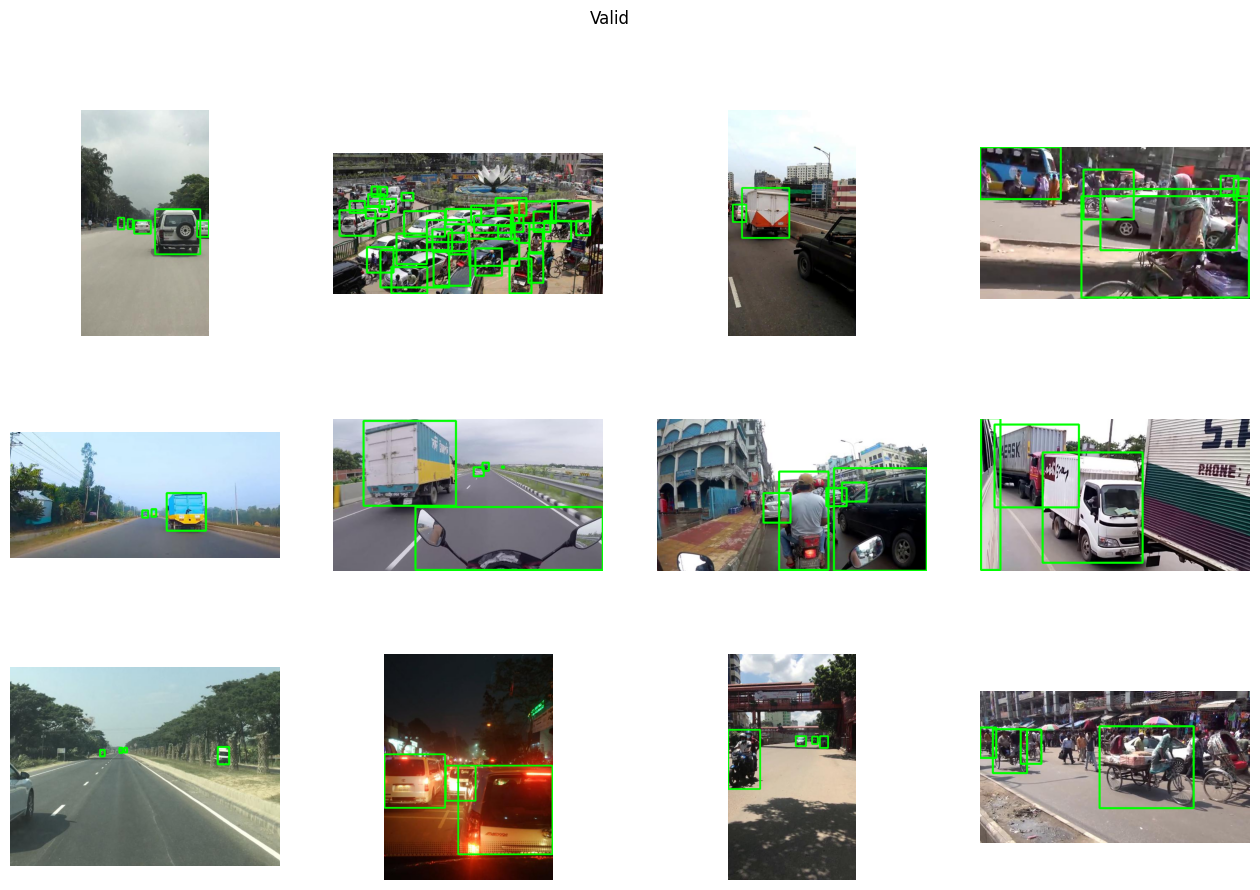

In [8]:
# List of all the valid images
image_files = os.listdir(valid_images)

# Choose 12 random image files from the list
random_images = random.sample(image_files, 12)

# Set up the plot
fig, axs = plt.subplots(3, 4, figsize=(16, 10))

for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)

    # Load the image
    image_path = os.path.join(valid_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    labels = loadLabels(image_file, valid_labels)

    # Plot object detections
    plotObjectDetections(axs[row, col], image, labels)

plt.suptitle("Valid")
plt.show()

In [9]:
# Class names found on the Dataset
with open('/content/trafic_data/data_1.yaml', 'r') as f:
    data_yaml = yaml.load(f, Loader=yaml.FullLoader)

data_yaml["names"]

['ambulance',
 'army vehicle',
 'auto rickshaw',
 'bicycle',
 'bus',
 'car',
 'garbagevan',
 'human hauler',
 'minibus',
 'minivan',
 'motorbike',
 'pickup',
 'policecar',
 'rickshaw',
 'scooter',
 'suv',
 'taxi',
 'three wheelers -CNG-',
 'truck',
 'van',
 'wheelbarrow']

# Comprobación del rendimiento del modelo

## Sin entrenamiento

### Modelo de Yolo

In [ ]:
# Cargamos el modelo de yolo
%cd /content
model = YOLO("yolov8x.pt")

metrics = model.val(data = '/content/trafic_data/data_1.yaml', device='cuda:0')

### Entrenamiento

In [10]:
# Entrenamiento
model = YOLO('yolov8x.pt')

model.train(data = '/content/trafic_data/data_1.yaml',
            device = '0',
            epochs = 20,
            seed = 42,
            batch = 8,
            workers = 4)

/content
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/trafic_data/data_1.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 24.4MB/s]


Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 127MB/s]


AMP: checks passed ✅


train: Scanning /content/trafic_data/train/labels... 2704 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2704/2704 [00:01<00:00, 2001.14it/s]

train: New cache created: /content/trafic_data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/trafic_data/valid/labels... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 1065.31it/s]

val: WARNING ⚠️ /content/trafic_data/valid/images/Pias--359-_PNG.rf.43bcf36efe5cf8c37552d2c45fffea60.jpg: 9 duplicate labels removed
val: WARNING ⚠️ /content/trafic_data/valid/images/Pias--360-_PNG.rf.8405b0e44009a9300e0a1100ccf7d5b3.jpg: 7 duplicate labels removed


val: New cache created: /content/trafic_data/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      7.97G      1.284      1.835      1.168        126        640: 100%|██████████| 338/338 [03:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.71it/s]

                   all        300       2568       0.57      0.306      0.306      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      8.27G      1.324      1.499      1.224        110        640: 100%|██████████| 338/338 [03:39<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.27it/s]

                   all        300       2568      0.508      0.323      0.333      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      8.32G      1.325      1.457      1.241        193        640: 100%|██████████| 338/338 [03:38<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.33it/s]

                   all        300       2568      0.513      0.326      0.325      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      8.34G       1.33      1.401      1.241        124        640: 100%|██████████| 338/338 [03:40<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.28it/s]

                   all        300       2568      0.548      0.349      0.352      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      8.34G      1.287      1.326      1.218         97        640: 100%|██████████| 338/338 [03:39<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.44it/s]

                   all        300       2568      0.634      0.352      0.366      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      8.34G      1.259      1.242      1.198         72        640: 100%|██████████| 338/338 [03:39<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.37it/s]

                   all        300       2568      0.632      0.383      0.385      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      7.51G       1.23      1.175      1.176        142        640: 100%|██████████| 338/338 [03:38<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.45it/s]

                   all        300       2568      0.653      0.376      0.422      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      7.54G      1.204      1.136      1.165        135        640: 100%|██████████| 338/338 [03:38<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.42it/s]

                   all        300       2568      0.607      0.429      0.432      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      7.51G      1.171       1.07      1.157        121        640: 100%|██████████| 338/338 [03:38<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.37it/s]

                   all        300       2568      0.722      0.401      0.486        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      7.52G       1.16      1.032      1.145        105        640: 100%|██████████| 338/338 [03:37<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.34it/s]

                   all        300       2568      0.666       0.43      0.436      0.273


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      7.48G      1.145     0.9731      1.133         46        640: 100%|██████████| 338/338 [03:38<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.33it/s]

                   all        300       2568      0.695       0.42      0.439      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      7.48G      1.133     0.9349      1.128         63        640: 100%|██████████| 338/338 [03:36<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.43it/s]

                   all        300       2568      0.632      0.467      0.468      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      7.46G      1.108     0.8823      1.112         37        640: 100%|██████████| 338/338 [03:36<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.35it/s]

                   all        300       2568       0.55      0.441      0.447      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      7.44G      1.086     0.8471      1.106         63        640: 100%|██████████| 338/338 [03:36<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.29it/s]

                   all        300       2568      0.652       0.47      0.483      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      7.61G      1.067      0.811      1.089        112        640: 100%|██████████| 338/338 [03:36<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.29it/s]

                   all        300       2568       0.68      0.451      0.478      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      7.48G      1.038     0.7608      1.069         62        640: 100%|██████████| 338/338 [03:36<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.46it/s]

                   all        300       2568      0.583      0.509      0.496       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      7.47G      1.011     0.7202      1.058         35        640: 100%|██████████| 338/338 [03:36<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.33it/s]

                   all        300       2568        0.5      0.536      0.472      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      7.49G      0.989     0.6867      1.043         44        640: 100%|██████████| 338/338 [03:36<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.47it/s]

                   all        300       2568      0.756      0.426      0.478      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      7.46G     0.9728     0.6648      1.037         76        640: 100%|██████████| 338/338 [03:36<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.37it/s]

                   all        300       2568      0.644       0.48      0.493      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      7.46G     0.9538     0.6342      1.027         80        640: 100%|██████████| 338/338 [03:36<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.25it/s]

                   all        300       2568      0.647      0.486      0.511      0.318



20 epochs completed in 1.295 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68143791 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.59it/s]


                   all        300       2568      0.646      0.487      0.512      0.317
               bicycle        300         32      0.666      0.688      0.691      0.351
                   bus        300        425      0.844      0.654      0.786      0.522
                   car        300        842      0.836       0.78      0.857      0.596
               minibus        300          2      0.457      0.457      0.271      0.188
               minivan        300        110      0.533      0.564      0.513      0.392
             motorbike        300        335      0.733       0.63      0.661      0.259
                pickup        300        142      0.724      0.338      0.498      0.309
             policecar        300          1          1          0          0          0
              rickshaw        300        192      0.755       0.75      0.769      0.501
               scooter        300          1          1          0      0.249     0.0498
                   su

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 3,  4,  5,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f26e8cec670>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044

## Con entrenamiento

In [28]:
# Cargamos el modelo preentrenado
%cd /content
model = YOLO("YOLOv8_Ve.pt")

metrics = model.val(data = '/content/trafic_data/data_1.yaml', device='cuda:0')

# result_predict = model.predict(source = os.path.join(valid_images, random_images[0]), imgsz=(416))

# plot = result_predict[0].plot()
# plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
# display(Image.fromarray(plot))

/content


FileNotFoundError: [Errno 2] No such file or directory: 'YOLOv8_Ve.pt'

In [ ]:
print(metrics.box.map)    # map50-95
print(metrics.box.map50)  # map50
print(metrics.box.map75)  # map75
print(metrics.box.maps)   # a list contains map50-95 of each category
print(metrics)

0.0032662107732823035
0.004191577395038353
0.003536167566610374
[  0.0032662   0.0032662   0.0032662   0.0029318    0.041713   0.0048532   0.0032662   0.0032662           0           0           0           0           0   0.0027617           0           0           0           0           0           0           0   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662
   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662
   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.00326


image 1/1 /content/trafic_data/train/images/Navid_415_jpg.rf.9d25a76a857773964063495a37a7f0e5.jpg: 416x256 2 cars, 1 motorbike, 1 rickshaw, 1 suv, 42.2ms
Speed: 5.8ms preprocess, 42.2ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 256)


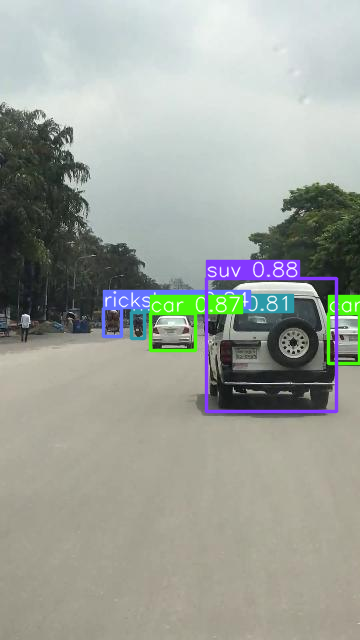

In [27]:
result_predict = model(source = os.path.join(valid_images, random_images[0]), imgsz=(416))

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

# result_predict[0]

# Explicación del tipo de ataque

# Preparar el ataque

# Realizamos el ataque

# Análisis de los resultados del ataque

# Aplicaciones en la vida real